## Kaggle Titanic Data Analysis and Prediction 
### Analysis:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of a number of passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others

In this analysis, we are taking a deep dive into a sample (train) data and looking for patterns or factors that play a role in chances of survival.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# load the data 
titanic = pd.read_csv("train.csv")

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,20-30,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30-40,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,20-30,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30-40,1,0,113803,53.1000,C123,S
4,5,Died,3,"Allen, Mr. William Henry",male,30-40,0,0,373450,8.0500,NaN,S


In [5]:
# Rename the Survived column for the sake of proper visualization
titanic["Survived"].replace(1, "Survived", inplace=True)
titanic["Survived"].replace(0, "Died", inplace=True)

In [11]:
# fill the missing values in age column with the mean age 
mean_age = round(titanic["Age"].mean())
titanic["Age"].fillna(mean_age, inplace=True)

0

In [13]:
# Divide age data into ranges for visualization purpose
for age in titanic["Age"]:
    if age in range(0,11):
        titanic["Age"].replace(age, "0-10", inplace=True)
    elif age in range(10,21): 
        titanic["Age"].replace(age, "10-20", inplace=True)
    elif age in range(20,31): 
        titanic["Age"].replace(age, "20-30", inplace=True) 
    elif age in range(30,41): 
        titanic["Age"].replace(age, "30-40", inplace=True) 
    elif age in range(40,51): 
        titanic["Age"].replace(age, "40-50", inplace=True)
    elif age in range(50,61): 
        titanic["Age"].replace(age, "50-60", inplace=True)
    elif age in range(60,71): 
        titanic["Age"].replace(age, "60-70", inplace=True)
    elif age in range(70,81): 
        titanic["Age"].replace(age, "70-80", inplace=True)    
    else: 
        titanic["Age"].replace(age, "other", inplace=True)

Our first step into this deep dive is taking a detailed look at the information of people who boarded the RMC Titanic, determining the average age of people who boarded, the age distribution, how much male/females boarded(gender distribution) etc.

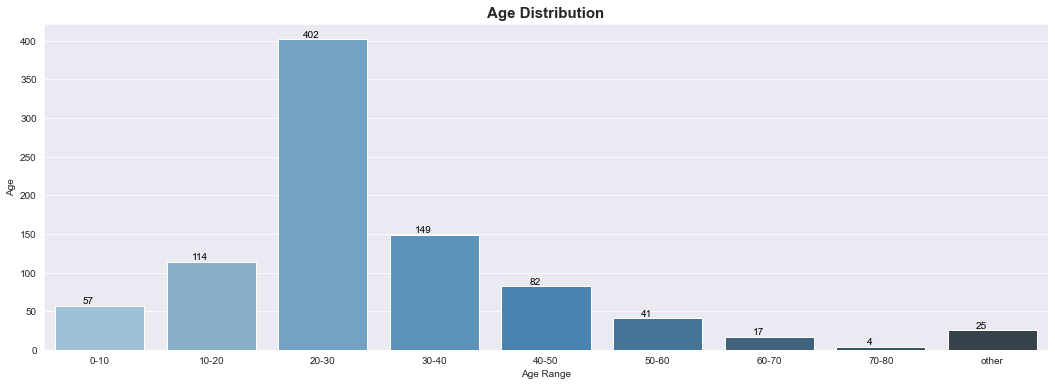

In [23]:
# Create a bar chart showing age range of people who boarded the titanic 
age_data = titanic["Age"].value_counts().sort_index()
plt.figure(figsize=(18, 6))
plt.title("Age Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Age Range")
plt.ylabel("Age-Range Frequency")

graph = sns.barplot(x=age_data.index, y=age_data, palette="Blues_d")
sns.set_style("darkgrid")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Age Distribution:
Although with a mean age of 30 years it is seen from the chart above that most of the people who boarded the titanic were between the ages of 20 and 30 years old 

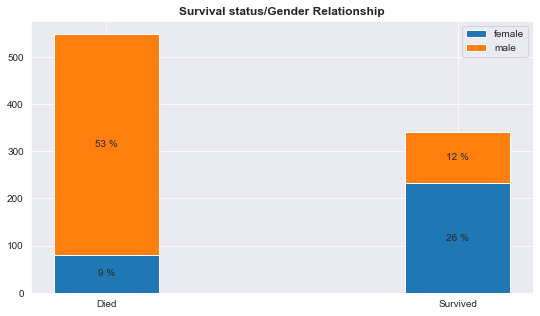

In [27]:
sex_surv = titanic.groupby("Survived")["Sex"].value_counts().sort_index().unstack()

fig, ax = plt.subplots(1,1, figsize=(9,5))
bf = np.zeros(len(sex_surv), dtype=float)
sex_surv

for col in sex_surv.columns:
    ax.bar(sex_surv.index, sex_surv[col], width=0.3, bottom=bf, label=col)
    bf += sex_surv[col]
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format((height/891) * 100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
    
ax.set_title("Survival status/Gender Relationship", loc="center", fontsize=12, fontweight='bold')    
ax.legend()
plt.show()

### Survival Percentage:
Based off this analysis it is observed in the chart above that 62% of the passengers in this survey data died in the fatal accident and out of the survivors females had a higher survival rate. 

Our next talking point is going to be to determine if age played a major role in the survival chances of the passengers on the cruise like the gender did. The chart below gives us a better insight. 

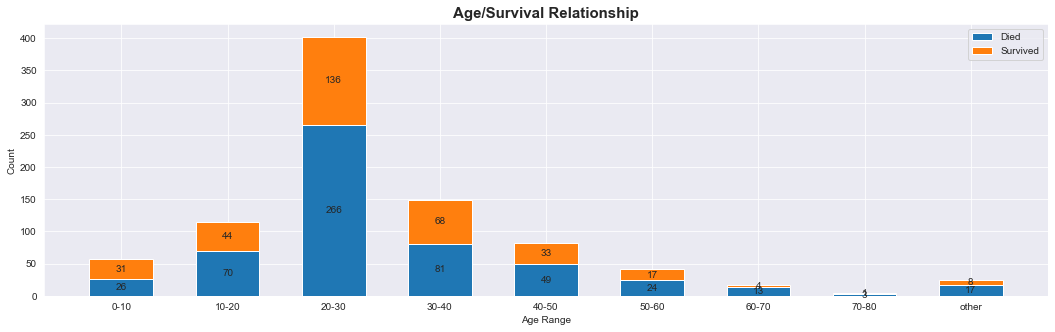

In [24]:
age_surv = titanic.groupby("Age")["Survived"].value_counts().sort_index().unstack()

fig, ax = plt.subplots(1,1, figsize=(18, 5))
af = np.zeros(len(age_surv), dtype=float)

for col in age_surv.columns:
    ax.bar(age_surv.index, age_surv[col], width=0.6, bottom=af, label=col)
    af += age_surv[col]
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
ax.legend()
plt.title("Age/Survival Relationship", fontsize=15, fontweight='bold')
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

From our analysis we see that young people within the age of twenty and thirty had higher chances of surviving, of the 342 people who survived 136 (39%) of them fall in this age range as well as 266 of the 549.

It is observed from this chart that only people in the 0-10 age range had a higher survival/death ratio, 54% of people in this age range survived this accident while people in the 70-80 age range had the lowest survival ratio with 75% of people in that age range dieing. 